In [135]:
import matplotlib.pyplot as plt
import numpy as np
from helper_functions import *

Generate random sequence of bits

In [136]:
N = 100
Tb = 0.1
Fs = 100
bitstr = bitgen(N)

Rectangular Pulse Shaping at Transmitter

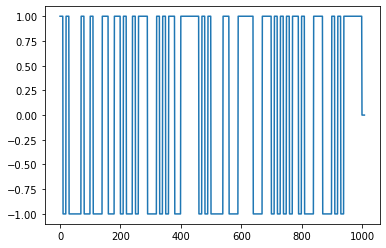

In [137]:
line_code = pam_code(bitstr, Tb, Fs)
plt.plot(line_code)

Eye Diagram of Transmitted Signal 

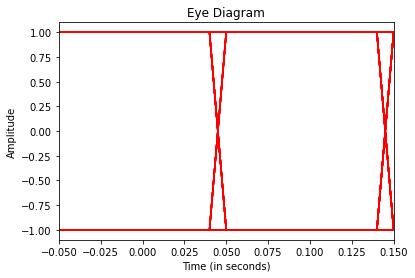

In [138]:
ax = plt.subplot()
eye_diagram(line_code, Tb, Fs, [-0.5*Tb, 1.5*Tb], 'Eye Diagram', ax = ax)
plt.show()

Channel Specifications

In [139]:
filter_length = 1000
freq_array = np.array([0, 1, 2, 4, 8, 16])/(8*Tb)
gain_array = np.array([1, 0.7, 0.9, 0.3, 0.5, 0])

Channel Magnitude Response and Output

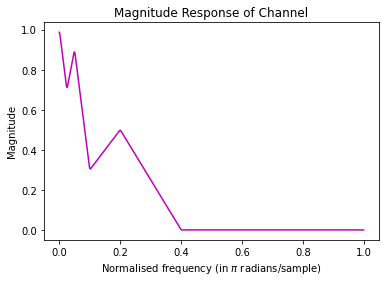

In [140]:
ax = plt.subplot()
ax, impulse_response, channel_output = anychannel(line_code, gain_array, freq_array, Fs, filter_length, 1, ax)

Eye Diagram of Channel Output

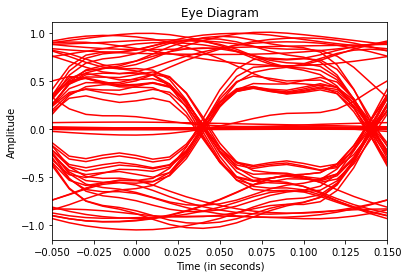

In [141]:
ax = plt.subplot()
eye_diagram(channel_output, Tb, Fs, [-0.5*Tb, 1.5*Tb], 'Eye Diagram', ax = ax)
plt.show()

Zero Forcing Equaliser

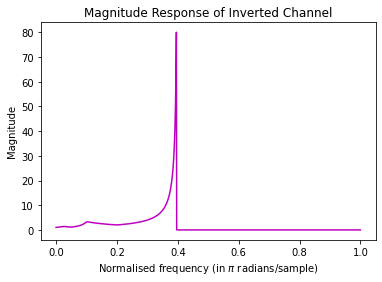

In [142]:
ax = plt.subplot()
ax, inv_channel, eq_output = zero_forcing_eq(channel_output, impulse_response, Fs, 1, ax)

Eye Diagram of Output after Zero Forcing Equalisation

<AxesSubplot:title={'center':'Eye Diagram'}, xlabel='Time (in seconds)', ylabel='Amplitude'>

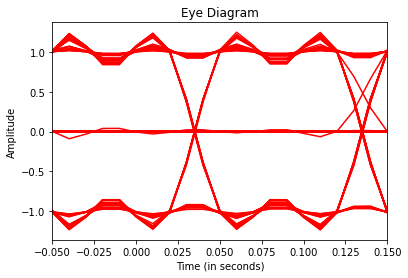

In [143]:
ax = plt.subplot()
eye_diagram(eq_output, Tb, Fs, [-0.5*Tb, 1.5*Tb], 'Eye Diagram', ax = ax)

Tapped Delay Equalisation

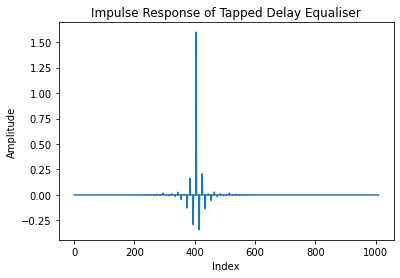

In [144]:
ax = plt.subplot()
order = 10
pulse_shape = np.array(np.ones(np.uint16(Tb*Fs)))
ax, eq_filter, eq_output, g = tapped_delay_eq(channel_output, order, Tb, Fs, pulse_shape, impulse_response, 1, ax)

Eye Diagram of Output after Tapped Delay Equalisation

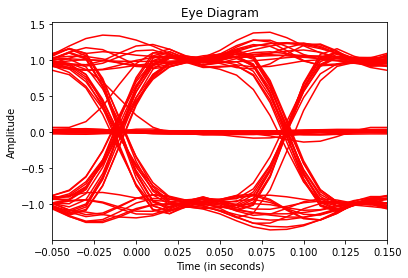

In [145]:
ax = plt.subplot()
eye_diagram(eq_output, Tb, Fs, [-0.5*Tb, 1.5*Tb], 'Eye Diagram', ax = ax)
plt.show()

Coefficients of Effective Pulse Shape 'g' obtained

[-1.03420405e-03  6.67024603e-04 -3.97975603e-04 -1.87486795e-04
  7.90508600e-04  5.00835581e-03  9.06297862e-04 -3.30951419e-03
 -2.41510984e-02  3.45877722e-02  9.98202663e-01 -3.30431146e-02
  2.55387118e-02  1.82137501e-03 -7.65618165e-04 -4.86719514e-03
 -4.93664468e-04  2.17935149e-05  2.53720773e-04 -6.44545968e-04
  1.14605674e-03]


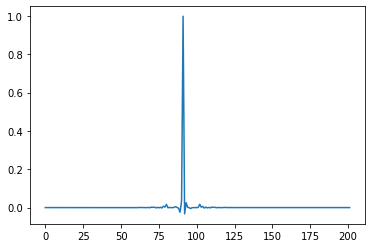

In [146]:
max_index = np.where(g == max(g))
print(g[(max_index[0][0] - order):(max_index[0][0] + order + 1)])
ax = plt.subplot()
ax.plot(g)